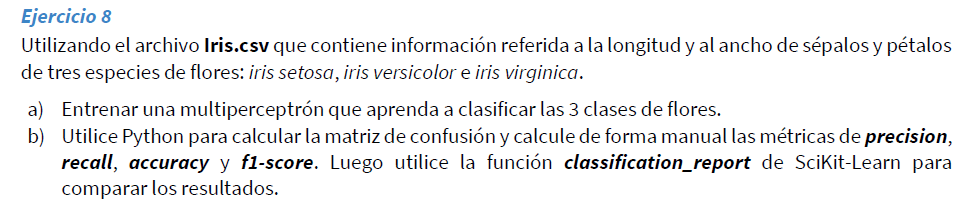

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

    sepallength  sepalwidth  petallength  petalwidth        class
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa


<Axes: >

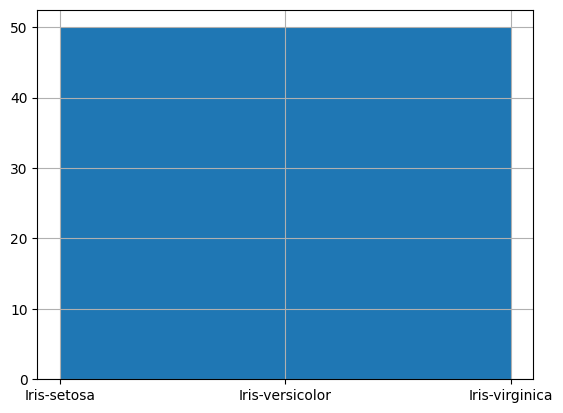

In [7]:
import pandas as pd
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection, metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import optimizers

from matplotlib import pyplot as plt
import plotly.express as px

nombre_archivo = DATOS_DIR + 'Iris.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

# Para hacer una inspección rápida de los datos
print(df.head(12))
#display(df)

#print(df.describe())
df['class'].hist(bins=3)
#df['class'].unique()

## Seleccion de atributos y target

In [10]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:, :-1])
Y_raw = np.array(df['class'])

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
print('Las clases del dataset son :', binarizer.classes_)

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
X_raw  = scaler.fit_transform( X_raw )

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.2 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

Las clases del dataset son : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Datos de Entrenamiento: 120   Datos de Testeo: 30


## Entrenamiento

In [11]:
ENTRADAS = X_train.shape[1]
OCULTAS = 4
SALIDAS  = Y_train.shape[1]
ACTIVACION = 'relu'

#OPTIMIZADOR = 'sgd'

print(X_train.shape)
print(X_test.shape)

EPOCAS = 500
TAM_LOTE = 32
ALFA = 0.005

modelo = Sequential()
modelo.add(Input(shape=(ENTRADAS,)))
modelo.add(Dense(OCULTAS, activation=ACTIVACION))
modelo.add(Dense(SALIDAS, activation='softmax'))

modelo.summary()

#optimizador = optimizers.SGD(learning_rate=ALFA)
optimizador = optimizers.Adam(learning_rate=ALFA)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# obtiene la arquitectura para el modelo y lo compila
modelo.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics = ['accuracy'])

# Entrena el modelo y guarda la historia del progreso
history = modelo.fit(x=X_train, y=Y_train, batch_size=TAM_LOTE, epochs=EPOCAS, callbacks=[early_stop], validation_split=0.2)

(120, 4)
(30, 4)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.1862 - loss: 1.3457 - val_accuracy: 0.0000e+00 - val_loss: 1.3748
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0091 - loss: 1.3061 - val_accuracy: 0.0000e+00 - val_loss: 1.3060
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0143 - loss: 1.2365 - val_accuracy: 0.0417 - val_loss: 1.2475
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0469 - loss: 1.1737 - val_accuracy: 0.1250 - val_loss: 1.1959
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1875 - loss: 1.1112 - val_accuracy: 0.2083 - val_loss: 1.1497
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2656 - loss: 1.0824 - val_accuracy: 0.3333 - val_loss: 1.1095
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3880 - loss: 1.0397 - val_accuracy: 0.4167 - val_loss: 1.0744
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4076 - loss: 1.0312 - val_accuracy: 0.4583 - v

## Medicion de entrenamiento

In [20]:
#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

accuracy = metrics.accuracy_score(Y_it, Y_pred_it)
print('Efectividad: %6.2f%%' % (accuracy*100) )

report = metrics.classification_report(Y_it, Y_pred_it)
print("Reporte SkLearn:\n%s" % report)
cm = metrics.confusion_matrix(Y_it, Y_pred_it)
print("Confusion matrix:\n%s" % cm)

accuracy = metrics.accuracy_score(Y_it, Y_pred_it)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Efectividad:  99.17%
Reporte SkLearn:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       0.97      1.00      0.99        39
 Iris-virginica       1.00      0.97      0.99        40

       accuracy                           0.99       120
      macro avg       0.99      0.99      0.99       120
   weighted avg       0.99      0.99      0.99       120

Confusion matrix:
[[41  0  0]
 [ 0 39  0]
 [ 0  1 39]]


## Medicion con Test

In [22]:
#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

accuracy = metrics.accuracy_score(Y_it, Y_pred_it)
print('Efectividad: %6.2f%%' % (accuracy*100) )

report = metrics.classification_report(Y_it, Y_pred_it)
print("Reporte SkLearn:\n%s" % report)
cm = metrics.confusion_matrix(Y_it, Y_pred_it)
print("Confusion matrix:\n%s" % cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Efectividad:  96.67%
Reporte SkLearn:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion matrix:
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
